# Mamoas Detection
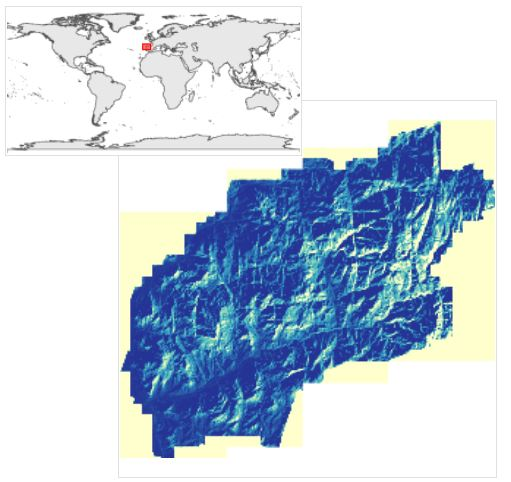

In [ ]:
!python -m pip show tensorflow

In [1]:
# Import relevant libraries
from tensorflow.keras.layers import Input, Activation, ZeroPadding2D, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.utils import np_utils
from keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import glob
import os.path
from pathlib import Path
import shutil
from os.path import exists
import seaborn as sns
import random
import ee
from PIL import Image

## Image Pre-Processing

In [11]:
# read all images of classes and convert .tif to .jpg format
path = "C:\\Users\\fabri\\Downloads\\folder data\\dataset_cnn\\"

data = []
width = 30
height = 30
dim = (width, height)

labels = ['mamoa', 'not_mamoa']
        
if(os.path.exists(path)):  
    for label in labels:
        p = os.path.join(path, label)
        class_num = labels.index(label)
        for img in os.listdir(p):
          img_array = cv2.imread(os.path.join(p,img), cv2.IMREAD_GRAYSCALE)
          resized = cv2.resize(img_array, dim, interpolation = cv2.INTER_AREA)
          data.append([resized, class_num])
else:
    print("This directory: "+path+" doesn't exist.")
# shuffle the dataset
random.shuffle(data)

# extract the features and label
x = []
y = []
for features, label in data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, height, width, 1)
y = np.array(y)

# Normalize the values of features
x = x/255

C:\Users\fabri\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

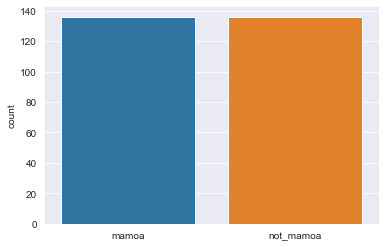

In [12]:
count = []
for i in range(0, len(data)):
    if (data[i][1] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')

sns.set_style('darkgrid')
sns.countplot(count)

# examples of two classes
#plt.figure(figsize = (5,5))
#plt.imshow(x[2], cmap='gray')
#if y[2] == 0: plt.title('mamoa')
#else: plt.title('not mamoa')

#plt.figure(figsize = (5,5))
#plt.imshow(x[10], cmap='gray')
#if y[10] == 0: plt.title('mamoa')
#else: plt.title('not mamoa')
 

## Train-Test-Val split

train, val, test: (190, 30, 30, 1) (41, 30, 30, 1) (41, 30, 30, 1)


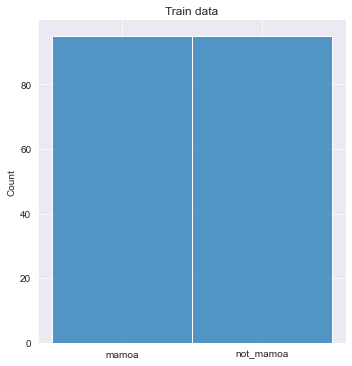

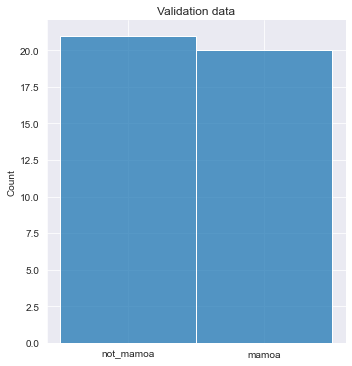

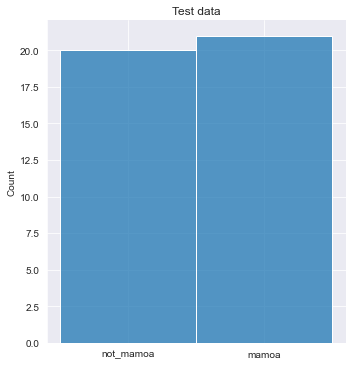

In [13]:
# split the dataset in train, validation and test using 60, 20, 20, respectively  change: 70, 15, 15
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7, test_size=0.3, random_state=None)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5, random_state=None)

print("train, val, test:",x_train.shape,x_val.shape,x_test.shape)

count = []
for i in range(0, len(y_train)):
    if (y_train[i] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')
sns.set_style('darkgrid')
sns.displot(count).set(title="Train data") 

count = []
for i in range(0, len(y_val)):
    if (y_val[i] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')
sns.set_style('darkgrid')
sns.displot(count).set(title="Validation data") 

count = []
for i in range(0, len(y_test)):
    if (y_test[i] == 0):
        count.append('mamoa')
    else:
        count.append('not_mamoa')
sns.set_style('darkgrid')
sns.displot(count).set(title="Test data") 

## Model Building

In [14]:
def MamoasModel(input_shape):
    """
    Implementation of the model.
    
    Arguments:
    input_shape -- shape of the images of the dataset
    
    Returns:
    model -- a Model() instance in Keras
    """
    # Use the suggested model in the text above to get started, and run through the whole
    # exercise once. Then come back and add more BLOCKS. 
    

    # BLOCK 1: CONV -> BN -> RELU -> MAXP
    X_input = Input(input_shape)
    X = ZeroPadding2D((3, 3))(X_input)
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool0')(X)

    # BLOCK 2: CONV -> BN -> RELU -> MAXP
    #X = ZeroPadding2D((3, 3))(X)
    #X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv1')(X)
    #X = BatchNormalization(axis = 3, name = 'bn1')(X)
    #X = Activation('relu')(X)
    #X = MaxPooling2D((2, 2), name='max_pool1')(X)
        
    # BLOCK N3: CONV -> BN -> RELU -> MAXP
    #X = ZeroPadding2D((3, 3))(X)
    #X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv2')(X)
    #X = BatchNormalization(axis = 3, name = 'bn2')(X)
    #X = Activation('relu')(X)
    #X = MaxPooling2D((2, 2), name='max_pool2')(X)
        
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    # Create model.
    model = Model(inputs = X_input, outputs = X, name='Model')
    
    return model

In [15]:
model = MamoasModel((height, width, 1))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ["accuracy"])
model.summary()

# plots the model in a nice layout and save it as ".png"
plot_model(model, to_file='model.png')

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 30, 1)]       0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 36, 36, 1)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 30, 30, 32)        1600      
                                                                 
 bn0 (BatchNormalization)    (None, 30, 30, 32)        128       
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pool0 (MaxPooling2D)    (None, 15, 15, 32)        0         
                                                             

## Model Evaluation

In [16]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=100) # patience 20, epoch 200

history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=300,callbacks=[early_stop],shuffle=True)

model.save("model.h5")
print("Saved model")

Epoch 1/300
6/6 [==============================] - 1s 68ms/step - loss: 0.5504 - accuracy: 0.7316 - val_loss: 0.6430 - val_accuracy: 0.5366
Epoch 2/300
6/6 [==============================] - 0s 39ms/step - loss: 0.3357 - accuracy: 0.8789 - val_loss: 0.6192 - val_accuracy: 0.7805
Epoch 3/300
6/6 [==============================] - 0s 37ms/step - loss: 0.2532 - accuracy: 0.8737 - val_loss: 0.6561 - val_accuracy: 0.5122
Epoch 4/300
6/6 [==============================] - 0s 36ms/step - loss: 0.2173 - accuracy: 0.9211 - val_loss: 0.6094 - val_accuracy: 0.6829
Epoch 5/300
6/6 [==============================] - 0s 35ms/step - loss: 0.1878 - accuracy: 0.9316 - val_loss: 0.5841 - val_accuracy: 0.7317
Epoch 6/300
6/6 [==============================] - 0s 37ms/step - loss: 0.1677 - accuracy: 0.9316 - val_loss: 0.5760 - val_accuracy: 0.7317
Epoch 7/300
6/6 [==============================] - 0s 45ms/step - loss: 0.1508 - accuracy: 0.9526 - val_loss: 0.5669 - val_accuracy: 0.7317
Epoch 8/300
6/6 [===

6/6 [==============================] - 0s 33ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.2537 - val_accuracy: 0.9024
Epoch 118/300
6/6 [==============================] - 0s 35ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.2561 - val_accuracy: 0.9024
Epoch 119/300
6/6 [==============================] - 0s 30ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.2575 - val_accuracy: 0.9024
Epoch 120/300
6/6 [==============================] - 0s 31ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2585 - val_accuracy: 0.9024
Epoch 121/300
6/6 [==============================] - 0s 31ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.2587 - val_accuracy: 0.8780
Epoch 122/300
6/6 [==============================] - 0s 31ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2612 - val_accuracy: 0.8780
Epoch 123/300
6/6 [==============================] - 0s 32ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.2615 - val_accuracy: 0.8780
Epoch 124/300
6/6 [=

Epoch 175/300
6/6 [==============================] - 0s 32ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2999 - val_accuracy: 0.8780
Epoch 176/300
6/6 [==============================] - 0s 32ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3008 - val_accuracy: 0.8780
Epoch 177/300
6/6 [==============================] - 0s 32ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3031 - val_accuracy: 0.8780
Epoch 178/300
6/6 [==============================] - 0s 33ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3056 - val_accuracy: 0.8780
Epoch 179/300
6/6 [==============================] - 0s 32ms/step - loss: 9.4652e-04 - accuracy: 1.0000 - val_loss: 0.3068 - val_accuracy: 0.8780
Epoch 179: early stopping
Saved model


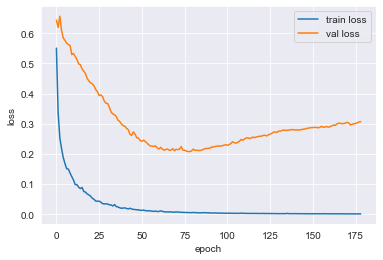

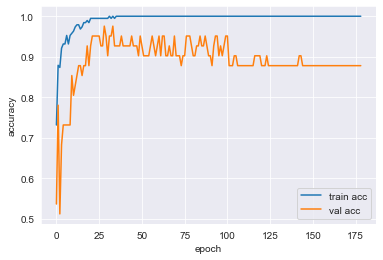

In [17]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.savefig('loss-graph.png')
plt.show()

# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('acc-graph.png')
plt.show()

In [18]:
#Test the model on train data  
preds = model.evaluate(x = x_train, y = y_train)

print ("Loss = " + str(preds[0]))
print ("Train Accuracy = " + str(preds[1]))
print()

#Test the model on validation data  
preds = model.evaluate(x = x_val, y = y_val)

print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))
print()

#Test the model on test data  
preds = model.evaluate(x = x_test, y = y_test)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print()

6/6 [==============================] - 0s 8ms/step - loss: 9.6656e-04 - accuracy: 1.0000
Loss = 0.0009665617253631353
Train Accuracy = 1.0

2/2 [==============================] - 0s 4ms/step - loss: 0.3068 - accuracy: 0.8780
Loss = 0.3067680597305298
Validation Accuracy = 0.8780487775802612

2/2 [==============================] - 0s 4ms/step - loss: 0.2811 - accuracy: 0.9268
Loss = 0.28109821677207947
Test Accuracy = 0.9268292784690857



              precision    recall  f1-score   support

       mamoa       0.86      0.90      0.88        20
   not_mamoa       0.90      0.86      0.88        21

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41



<AxesSubplot:>

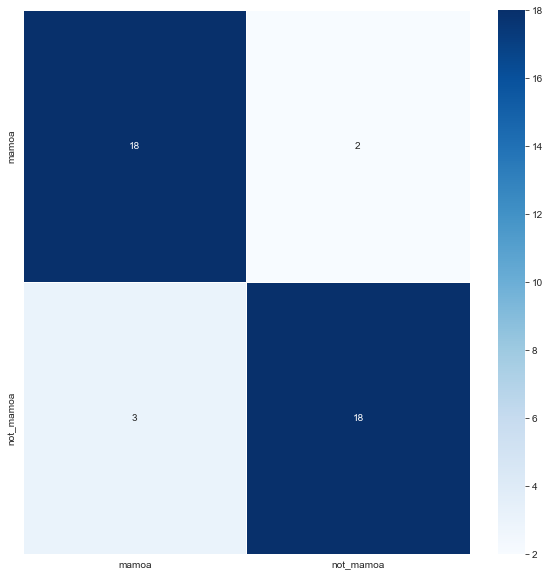

In [19]:
y_val_pred = model.predict(x_val)
#y_val_pred=np.argmax(y_val_pred, axis=1)
predict = []
for i in y_val_pred:
    if i[0] >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
y_val_pred = np.array(predict)

target_names = ['mamoa', 'not_mamoa']
print(classification_report(y_val, y_val_pred, target_names = target_names))

conf_matrix = confusion_matrix(y_val, y_val_pred)
conf_matrix = pd.DataFrame(conf_matrix , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Blues", linewidth = 1 , annot = True, fmt='g',xticklabels = labels,yticklabels = labels)

              precision    recall  f1-score   support

       mamoa       0.91      0.95      0.93        21
   not mamoa       0.95      0.90      0.92        20

    accuracy                           0.93        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.93      0.93      0.93        41



<AxesSubplot:>

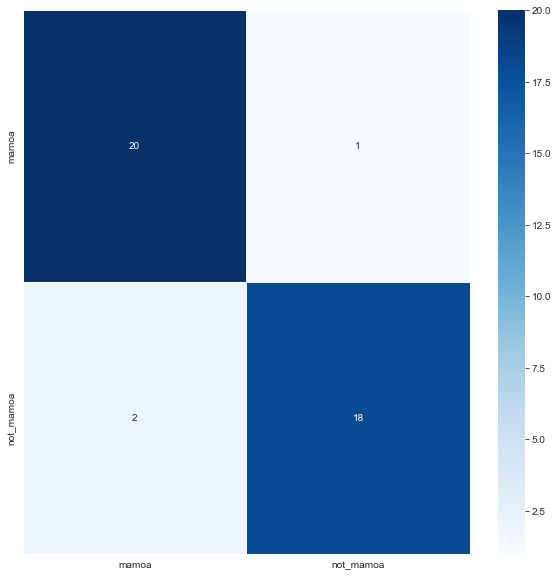

In [21]:
y_test_pred = model.predict(x_test)

#y_test_pred=np.argmax(y_test_pred, axis=1)
predict = []
for i in y_test_pred:
    if i[0] >= 0.5:
        predict.append(1)
    else:
        predict.append(0)
y_test_pred = np.array(predict)

target_names = ['mamoa', 'not mamoa']
print(classification_report(y_test, y_test_pred, target_names = target_names))

conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix = pd.DataFrame(conf_matrix , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, cmap= "Blues", linewidth = 1 , annot = True, fmt='g',xticklabels = labels,yticklabels = labels)

# Predict in LRM - Local Relief Model

In [2]:
model = load_model('model.h5')

In [3]:
# Authentication of google earth engine to access some files as example the local relief model
ee.Authenticate()
# Initialization of google earth engine
ee.Initialize()

Enter verification code: 4/1AX4XfWin4N0AkDOGBPxH2QAIjNoGhq6WFtUBpY-T2yQaPOhR-OssYfxZQTY

Successfully saved authorization token.


In [4]:
LRM = ee.Image('users/fabriziobotelho/tiff_files')
geometry = LRM.geometry()
lrm_info = LRM.getInfo()
print(lrm_info) #debug

#geo-coordinates of upper left and lower right corners of LRM image
upper_left = [-8.907277129492169,42.16335245423417]
lower_right = [-8.06051504207768,41.59280385023923]

points = ee.Geometry.MultiPoint([upper_left, lower_right])

{'type': 'Image', 'bands': [{'id': 'b1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [69977, 63086], 'crs': 'EPSG:3763', 'crs_transform': [1, 0, -63978.5, 0, -1, 277085.5]}, {'id': 'b2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [69977, 63086], 'crs': 'EPSG:3763', 'crs_transform': [1, 0, -63978.5, 0, -1, 277085.5]}, {'id': 'b3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [69977, 63086], 'crs': 'EPSG:3763', 'crs_transform': [1, 0, -63978.5, 0, -1, 277085.5]}, {'id': 'b4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 255}, 'dimensions': [69977, 63086], 'crs': 'EPSG:3763', 'crs_transform': [1, 0, -63978.5, 0, -1, 277085.5]}], 'version': 1644944174622534, 'id': 'users/fabriziobotelho/tiff_files', 'properties': {'system:footprint': {'type': 'LinearRing', 'coordinates': [[-8.900443739793436, 41.59280407757193], [-8.90044

In [5]:
#this function gets the dimention in pixel of LRM image
def getDimentionsImage(img):
  imgDescription = ee.Algorithms.Describe(img)
  w = ee.List(ee.Dictionary(ee.List(ee.Dictionary(imgDescription).get("bands")).get(0)).get("dimensions")).get(0)
  w = w.getInfo()
  h = ee.List(ee.Dictionary(ee.List(ee.Dictionary(imgDescription).get("bands")).get(0)).get("dimensions")).get(1)
  h = h.getInfo()

  return w, h

#this function uses the equations before obtained to convert a geo-coordinate to pixel coordinate
def convert_GeoCoord_to_PixelCoord(geocoordinate, m1, m2, b1, b2):
  x_geo = geocoordinate[0]
  y_geo = geocoordinate[1]
  x = round(x_geo * m1 + b1)
  y = round(y_geo * m2 + b2)
  
  return x, y

#this function is the inverse of the previous function, with it we can get the geo-coordinates that corresponds to the pixel coordinates
def convert_PixelCoord_to_GeoCoord(pixelcoordinate, m1, m2, b1, b2):
  x = pixelcoordinate[0]
  y = pixelcoordinate[1]
  x_geo = (x - b1)/m1
  y_geo = (y - b2)/m2
  
  return x_geo, y_geo

In [6]:
width, height = getDimentionsImage(LRM)
width, height

(69977, 63086)

In [7]:
x_geo1 = upper_left[0]
y_geo1 = upper_left[1]
x_geo2 = lower_right[0]
y_geo2 = lower_right[1]

x1 = 0;
y1 = 0;
x2 = width - 1 
y2 = height - 1

#equations to convert geo-coordinates to pixel coordinates
#x = x_geo * m1 + b1
#y = y_geo * m2 + b2

m1 = (x1 - x2)/(x_geo1 - x_geo2)
b1 = x1 - x_geo1 * m1
print('m1:', m1, 'b1:', b1)

m2 = (y1 - y2)/(y_geo1 - y_geo2)
b2 = y1 - y_geo1 * m2
print('m2:', m2, 'b2:', b2)

m1: 82639.5052873298 b1: 736092.9754383798
m2: -110569.01998932785 b2: 4661960.560329294


In [8]:
# create just a block with mamoas of laboreiro region to analyse the model performance

geometria = ee.Geometry.Polygon([[[-8.143058475037481,42.026511966913404],
                                    [-8.0616909823617,42.026511966913404],
                                    [-8.0616909823617,42.082594290923005],
                                    [-8.143058475037481,42.082594290923005],
                                    [-8.143058475037481,42.026511966913404]]])

LRM = LRM.clip(geometria)
upper_left = [-8.143058475037481,42.026511966913404]
lower_right = [-8.0616909823617,42.082594290923005]

points = ee.Geometry.MultiPoint([upper_left, lower_right])
width, height = getDimentionsImage(LRM)
x_geo1 = upper_left[0]
y_geo1 = upper_left[1]
x_geo2 = lower_right[0]
y_geo2 = lower_right[1]

x1 = 0;
y1 = 0;
x2 = width - 1 
y2 = height - 1

#equations to convert geo-coordinates to pixel coordinates
#x = x_geo * m1 + b1
#y = y_geo * m2 + b2

m1 = (x1 - x2)/(x_geo1 - x_geo2)
b1 = x1 - x_geo1 * m1
print('m1:', m1, 'b1:', b1)

m2 = (y1 - y2)/(y_geo1 - y_geo2)
b2 = y1 - y_geo1 * m2
print('m2:', m2, 'b2:', b2)

width, height


m1: 82821.77290201595 b1: 674422.5397473905
m2: 111122.35646534685 b2: -4670085.043782516


(6740, 6233)

In [20]:
# read shapefile, geocoordinate of archaeologycal objects

# read laboreiro region
shape_lab = ee.FeatureCollection('users/fabriziobotelho/MamoasLaboreiro')
shape_lab = shape_lab.geometry()
coordinates_lab = shape_lab.coordinates().getInfo()
len(coordinates_lab)

85

In [21]:
lab_pixel = []
for i in coordinates_lab:
  lab_pixel.append(convert_GeoCoord_to_PixelCoord(i, m1, m2, b1, b2))

#print('geo coordinates:', coordinates_lab)
#print('pixel_coordinates:', lab_pixel) 
#print('length:', len(lab_pixel))  

In [22]:
#this function counts the number of archaeological objects inside the block image, and we just want the images with this objects
def CountNumberOfMamoas(Xmin, Ymin, Xmax, Ymax, scales):
  count = 0
  arr1 = []
  arr2 = []
  center = []
    
  #read mamoas of arcos (51 mamoas)
  #for i in arcos_pixel:
    #x = i[0]
    #y = i[1]

    #if x >= Xmin and x <= Xmax and y >= Ymin and y <= Ymax:
      #count = count + 1
      #arr1.append(int((x - Xmin)/scales))
      #arr2.append(int((y - Ymin)/scales))
      #center = list(zip(arr1, arr2))

  #read mamoas of laboreiro (85 mamoas)
  for i in lab_pixel:
    x = i[0]
    y = i[1]
    if x >= Xmin and x <= Xmax and y >= Ymin and y <= Ymax:
      count = count + 1
      arr1.append(int((x - Xmin)/scales))
      arr2.append(int((y - Ymin)/scales))
      center = list(zip(arr1, arr2))

  return count, center

In [44]:
dim = 30 # pixels
scale = 0.5 # m/px corresponds to dim * scale = 40 meters on terrain
per = 50 # % percentage of slide in image (0 - 100)%
slide = dim * per/100
w=30
h=30
dims = (w,h)

countObj = 0
out = []
tp, fp, tn, fn = 0, 0, 0, 0
possible_geocoord = []

# create a polygon
x11 = 0
x12 = 0
x21 = dim
x22 = 0
x31 = dim
x32 = dim
x41 = 0
x42 = dim

rows = round(((height)/dim) / (per/100))
columns = round(((width)/dim) / (per/100))
print(rows, columns)

for i in range(rows):
    #print("#####################", i, "#########################")
    for j in range(columns):
        #print(j)
        x1 = convert_PixelCoord_to_GeoCoord([x11, x12], m1, m2, b1, b2)
        x2 = convert_PixelCoord_to_GeoCoord([x21, x22], m1, m2, b1, b2)
        x3 = convert_PixelCoord_to_GeoCoord([x31, x32], m1, m2, b1, b2)
        x4 = convert_PixelCoord_to_GeoCoord([x41, x42], m1, m2, b1, b2)
        
        nMamoas, centerPoint = CountNumberOfMamoas(x11, x12, x31, x32, scale)    
        
        block = ee.Geometry.Polygon([[x1[0], x1[1]], [x2[0], x2[1]], [x3[0], x3[1]], [x4[0], x4[1]]])
        img = LRM.clipToBoundsAndScale(block, None, None, None, scale)
        img = img.unmask()

        band_arrs = img.sampleRectangle(block)
        band_arrs = band_arrs.get('b1')
            
        # Transfer the arrays from server to client and cast as np array.
        np_arr_b1 = np.array(band_arrs.getInfo())
        #print(np_arr_b1)
        
        array = np.array(np_arr_b1, dtype='uint8')
        resized = cv2.resize(array, dims, interpolation = cv2.INTER_AREA)
        
        array = np.array(resized).reshape(-1, h, w, 1)
        array = array/255 # normalization
        
        #a_mean= np.mean(array)
        #if (a_mean != 0):
        pred = model.predict(array)
            #pred=np.argmax(pred, axis=1)
        if pred[0] < 0.5:
            countObj+=1
            #print(countObj)
            #plt.imshow(array, cmap='gray')
            im = Image.fromarray(resized)
            im.save("C:\\Users\\fabri\\Downloads\\folder data\\scan\\"+str(j)+"_"+str(i)+".jpg")
            if nMamoas > 0:
                out.append([str(j)+"_"+str(i)+".jpg", 0, True])
                tp+=1
            else:
                out.append([str(j)+"_"+str(i)+".jpg", 0, False])
                fp+=1
                cx = round((x31 - x11)/2)
                cy = round((x32 - x12)/2)
                coord = convert_PixelCoord_to_GeoCoord([cx, cy], m1, m2, b1, b2)
                possible_geocoord.append(coord)
        else:
            im = Image.fromarray(resized)
            #im.save("C:\\Users\\fabri\\Downloads\\folder data\\scan\\not_mamoa\\"+str(j)+"_"+str(i)+".jpg")   
            if nMamoas == 0:
                out.append([str(j)+"_"+str(i)+".jpg", 1, True])
                tn+=1
            else:
                out.append([str(j)+"_"+str(i)+".jpg", 1, False])
                fn+=1
            
        x11 = x21
        x12 = x22
        x21 = x21 + slide
        x22 = x22
        x41 = x31
        x42 = x42 
        x31 = x31 + slide
        x32 = x32
    
    x11 = 0
    x21 = 0
    x41 = 0
    x31 = 0

    x12 = x12 + slide
    x22 = x22 + slide
    x42 = x42 + slide
    x32 = x32 + slide
    j = 0

print("Detected: ", countObj, " mamoas.")
print("True positives: ",tp)
print("False positives: ",fp)
print("True negatives: ",tn)
print("False negative: ",fn)

416 449


KeyboardInterrupt: 

In [43]:
name = []
prediction = []
conclusion = []
path = "C:\\Users\\fabri\\Downloads\\folder data\\"

for i,j,k in out:
    name.append(i)
    prediction.append(j)
    conclusion.append(k)
    
df = pd.DataFrame({'imageID': name,
                   'predict(0=mamoa,1=not_mamoa)': prediction,
                   'conclusion': conclusion})
if os.path.exists(path):
    df.to_csv(path+"out.csv")
else:
    print("path",path,"doesn't exist.")


In [29]:
possible_geocoord

[(-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.02664695325168),
 (-8.142961882079861, 42.026646953